In [3]:
from syft import jax as syft_jax
from syft import jnp as syft_jnp
import jax
import jax.numpy as jnp

In [4]:
x = syft_jnp.arange(10)
print(x)
print(type(x))

[0 1 2 3 4 5 6 7 8 9]
<class 'syft.core.node.new.jax.DeviceArrayObject'>


In [5]:
x

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
long_vector = syft_jnp.arange(int(1e7))

%timeit syft_jnp.dot(long_vector, long_vector).block_until_ready()

3.77 ms ± 53.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
def sum_of_squares(x):
  return syft_jnp.sum(x**2)

In [8]:
sum_of_squares_dx = syft_jax.grad(sum_of_squares)

x = syft_jnp.asarray([1.0, 2.0, 3.0, 4.0])
x

DeviceArray([1., 2., 3., 4.], dtype=float64)

In [9]:
print(type(sum_of_squares(x)))
print(type(sum_of_squares_dx(x)))

<class 'syft.core.node.new.jax.DeviceArrayObject'>
<class 'syft.core.node.new.jax.DeviceArrayObject'>


In [10]:
sum_of_squares_dx

<function syft.core.node.new.jax.wrap_result.<locals>.wrapper(*args, **kwargs)>

In [11]:
def sum_squared_error(x, y):
  return syft_jnp.sum((x-y)**2)

sum_squared_error_dx = syft_jax.grad(sum_squared_error)

y = syft_jnp.asarray([1.1, 2.1, 3.1, 4.1])

print(type(sum_squared_error_dx(x, y)))

<class 'syft.core.node.new.jax.DeviceArrayObject'>


In [12]:
type(syft_jax.value_and_grad(sum_squared_error)(x, y)[0])


syft.core.node.new.jax.DeviceArrayObject

In [13]:
def squared_error_with_aux(x, y):
  return sum_squared_error(x, y), x-y

syft_jax.grad(squared_error_with_aux)(x, y)

TypeError: Gradient only defined for scalar-output functions. Output was (DeviceArray(0.04, dtype=float64), DeviceArray([-0.1, -0.1, -0.1, -0.1], dtype=float64)).

In [14]:
syft_jax.grad(squared_error_with_aux, has_aux=True)(x, y)[0]


DeviceArray([-0.2, -0.2, -0.2, -0.2], dtype=float64)

In [15]:
import numpy as np

x = np.array([1, 2, 3])

def in_place_modify(x):
  x[0] = 123
  return None

in_place_modify(x)
x

array([123,   2,   3])

In [16]:
in_place_modify(syft_jnp.array(x))

TypeError: '<class 'jaxlib.xla_extension.DeviceArray'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [17]:
def jax_in_place_modify(x):
  return x.at[0].set(123)

y = syft_jnp.array([1, 2, 3])
type(jax_in_place_modify(y))

syft.core.node.new.jax.DeviceArrayObject

In [18]:
type(y)

syft.core.node.new.jax.DeviceArrayObject

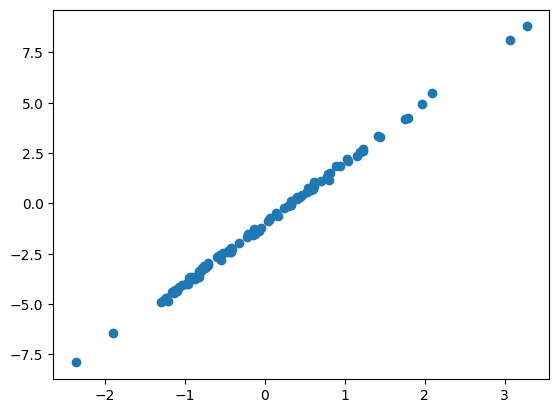

In [19]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

In [20]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

In [21]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return syft_jnp.mean((prediction-y)**2)

In [22]:
def update(theta, x, y, lr=0.1):
  return theta - lr * syft_jax.grad(loss_fn)(theta, x, y)

TypeError: _reconstruct() takes from 4 to 7 positional arguments but 12 were given

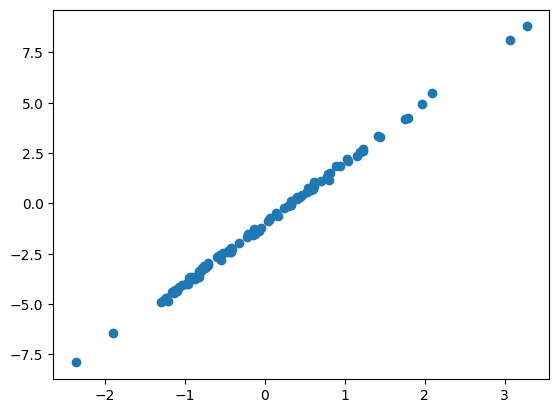

In [23]:
theta = syft_jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")